# LOAD package

In [23]:
%pylab
from astropy.table import Table

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/home/yunzheng/.local/anaconda/envs/mynumba/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['gamma', 'trapz', 'f', 'number']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import quad,trapz
from scipy.special import gamma
from scipy.optimize import curve_fit

In [25]:
import seaborn as sns
sns.set()
# sns.set(rc={'figure.figsize':(15.7,9.27)})
# sns.set_style("ticks")

# LOAD data

## total nwp

### 直接观测得到的N

In [4]:
cen_bin = [11.4, 11.6, 11.8]
sate_bin = [9.0, 9.5, 10.0, 10.5,11.0]
rvir = np.array([643.4968999301032,788.7737148534878 ])/1000

In [40]:
np.searchsorted?

Signature: np.searchsorted(a, v, side='left', sorter=None)
Docstring:
Find indices where elements should be inserted to maintain order.

Find the indices into a sorted array `a` such that, if the
corresponding elements in `v` were inserted before the indices, the
order of `a` would be preserved.

Assuming that `a` is sorted:

======  ============================
`side`  returned index `i` satisfies
======  ============================
left    ``a[i-1] < v <= a[i]``
right   ``a[i-1] <= v < a[i]``
======  ============================

Parameters
----------
a : 1-D array_like
    Input array. If `sorter` is None, then it must be sorted in
    ascending order, otherwise `sorter` must be an array of indices
    that sort it.
v : array_like
    Values to insert into `a`.
side : {'left', 'right'}, optional
    If 'left', the index of the first suitable location found is given.
    If 'right', return the last such index.  If there is no suitable
    index, return either 0 or N (where N is the 

In [59]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
# r_need = r_need[4:-2]
number = np.zeros((2,4))

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        data = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        index = np.searchsorted(r,rvir[i])
#         print("The index:",index)      #6
#         print("The r :",r[index])  #1.0

        rp_new = np.hstack((r[1:index],rvir[i]))
#         print("The rp:",rp_new)
        r_need_new = r_need[1:index]
#         print("The rneed new",r_need_new)
        nwp_new = data[1][1:index]



        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter)
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)

        
        print("the nwp_new:")
        print(nwp_new)
        N = np.zeros(len(rp_new)-1)
        print("The number for each bin:")
        for k in range(len(rp_new)-1):
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k]
            print(N[k])
        print("The total number:")
        print(np.sum(N)) 
        number[i][j] = np.sum(N)
        
np.save("./all/original_num2.npy",number)

The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.21263139 1.1280089 ]
The nwp_inter: 1.5572528550297455
the nwp_new:
[7.3033171  5.12528399 3.59928519 2.21263139 1.55725286]
The number for each bin:
0.34688793866751266
0.6114866451225076
1.0786618056384265
1.6656283749304979
0.07818355190745839
The total number:
3.780848316266403
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.90231027 1.48025354]
The nwp_inter: 2.043112808209821
the nwp_new:
[12.80349565  8.29585668  4.68147244  2.90231027  2.04311281]
The number for each bin:
0.6081316413439607
0.9897608758032768
1.4029801076909838
2.1848060012972628
0.10257667261776472
The total number:
5.288255298753249
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.60732591 1.35970125]
The nwp_inter: 1.8568554238929493
the nwp_new:
[10.76476478  7.26992299  4.31337076  2.60732591  1.85685542]
The number for each bin:
0.5112974029

In [60]:
number

array([[ 3.78084832,  5.2882553 ,  4.72729346,  2.12829986],
       [ 6.76388127, 10.02689583,  9.05206361,  4.14363143]])

### 计算修正比例

In [94]:
nwp[0][:6]

array([0.07943282, 0.12589254, 0.19952623, 0.31622777, 0.50118723,
       0.79432823])

In [93]:
r_need0[:10]

array([0.01258925, 0.01995262, 0.03162278, 0.05011872, 0.07943282,
       0.12589254, 0.19952623, 0.31622777, 0.50118723, 0.79432823])

In [96]:
r_need0[:5]

array([0.01258925, 0.01995262, 0.03162278, 0.05011872, 0.07943282])

In [95]:
nwp[0][1:6]

array([0.12589254, 0.19952623, 0.31622777, 0.50118723, 0.79432823])

In [102]:
r0 = np.logspace(-2, 2, 21)
# r = r[4:]
r_need0 = 10**((np.log10(r0[1:])+np.log10(r0[:-1]))/2.0)
number_new = np.zeros((2,4))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        nwp = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        
        def func_wp(rp,r1,gam):
            y = rp**(1-gam)*r1**gam*gamma(0.5)*gamma(0.5*(gam-1))/gamma(0.5*gam)
            return y
        
        
        popt,pcov = curve_fit(func_wp,nwp[0][1:7],nwp[1][1:7],sigma = nwp[2][1:7],p0=(5,2.05))
        print(popt)
        perr = np.sqrt(np.diag(pcov))
#         print(perr)
        
#         plt.plot(nwp[0],nwp[1],color = color[j])
#         plt.plot(r_need0[:11],func_wp(r_need0[:11],*popt),color = color[j])
#         plt.xscale("log")
#         plt.yscale("log")
#         plt.xlim(0.01,10)
#         plt.ylim(0.1,1000)
        
        
        def part_wp1(r,rp0,r1,gam):
            y = 2*r1**gam*r**(1-gam)*(r**2 - rp0**2)**(-0.5)
            return y
        
        def func_wp1(rp,rvir0,r1,gam):
            y = quad(part_wp1,rp,rvir0,args = (rp,r1,gam))
            return y
        

##############calculate ratio###########
        nwp_new = func_wp(r_need0[:5],*popt)
        index = np.searchsorted(r0,rvir[i])
#         print("The index:",index)      #10


        nwp_new = np.hstack((nwp_new,nwp[1][1:index-4]))
#         print("The nwp_new:",nwp_new)
        rp_new = np.hstack((r0[:index],rvir[i]))
        r_need_new = r_need0[:index]
        print(r_need_new)


        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter,fill_value ='extrapolate')
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)


        N = np.zeros(len(rp_new)-1)
        for k in range(len(rp_new)-1):
            ratio_corr = (func_wp1(rp_new[k],rvir[i],popt[0],popt[1])[0])/func_wp(rp_new[k],popt[0],popt[1])
            print("The corr ratio:")
            print(ratio_corr)
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k] * ratio_corr

        number_new[i][j] = np.sum(N)
np.save("./all/corr_num2.npy",number_new)

[0.56236571 2.02490825]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.21263139 1.1280089 ]
The nwp_inter: 1.5572528550297455
The corr ratio:
0.9911486804007993
The corr ratio:
0.9858088842072054
The corr ratio:
0.9772455824690389
The corr ratio:
0.96350635863857
The corr ratio:
0.9414365423960989
The corr ratio:
0.9058779808820189
The corr ratio:
0.8481390944832646
The corr ratio:
0.7523960315099313
The corr ratio:
0.5830526925850658
The corr ratio:
0.12802337519693494
[0.66229188 2.21526251]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.90231027 1.48025354]
The nwp_inter: 2.043112808209821
The corr ratio:
0.99620676364905
The corr ratio:
0.993361157268466
The corr ratio:
0.9883796

In [103]:
number_new

array([[3.20548898, 5.20634967, 4.49580867, 1.94777966],
       [5.54479543, 9.69399733, 8.93544424, 3.54602711]])

In [104]:
number

array([[ 3.78084832,  5.2882553 ,  4.72729346,  2.12829986],
       [ 6.76388127, 10.02689583,  9.05206361,  4.14363143]])

In [105]:
number_new / number

array([[0.84782269, 0.98451179, 0.95103228, 0.91518103],
       [0.81976534, 0.96679945, 0.98711682, 0.85577764]])

## LOAD each field nwp

In [106]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

m_sate = [9.0,9.5,10.0,10.5,11.0]
m_cen = [11.4,11.6,11.8]

jack=50
zs = ['0p075','0p125','0p175']

num0 = np.load("./all/original_num2.npy")
num1 = np.load("./all/corr_num2.npy")
fq_original = num1/num0


number = np.zeros((2,4,50))
for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))


            pcf += (data * para)
            para1 += para

        pcf = pcf / para1
        
        
        for q in range(50):
            
            index = np.searchsorted(r,rvir[i])
            print("The index rvir:")
            print(index)
            print(r[index])


        
            nwp_new = pcf[q][1:index]
            rp_new = np.hstack((r[1:index],rvir[i]))
            r_need_new = r_need[1:index]
    #         print(r_need_new)


            r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
            print("The inter r:",r_inter)


            r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
            print("the inter rneed bin:",r_need_inter)


            nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
            print("the nwp interbin:",10**nwp_inter)


            f = interp1d(r_need_inter,nwp_inter)
            nwp_inter0 = f(r_inter)
            nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
            print("The nwp_inter:",10**nwp_inter0)


            N = np.zeros(len(rp_new)-1)
            for p in range(len(rp_new)-1):
                N[p] = np.pi * (rp_new[p+1]**2-rp_new[p]**2) * nwp_new[p] * fq_original[i][j]

            print("The total number:")
            print(np.sum(N))
            
            number[i][j][q] = np.sum(N)
np.save("./all/eachfield_result2.npy",number)

The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.22621091 1.13480216]
The nwp_inter: 1.5667168292068248
The total number:
3.239412706567628
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.22210925 1.12989215]
The nwp_inter: 1.5617997712249845
The total number:
3.236114787869605
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.23572712 1.16287611]
The nwp_inter: 1.5900492830267905
The total number:
3.235362714745969
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.20293644 1.13551158]
The nwp_inter: 1.5593635139725688
The total number:
3.1902832233113116
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.19800798 1.12011899]
The nwp_inter: 1.5466478791737306
The total number:
3.1911031078

# red galaxy 

## all red galaxy

In [107]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
# r_need = r_need[4:-2]
number = np.zeros((2,4))

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        data = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        index = np.searchsorted(r,rvir[i])
        
        nwp_new = data[1][1:index]
        rp_new = np.hstack((r[1:index],rvir[i]))
        r_need_new = r_need[1:index]
#         print(r_need_new)


        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter)
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)

        
        print("the nwp_new:")
        print(nwp_new)
        N = np.zeros(len(rp_new)-1)
        print("The number for each bin:")
        for k in range(len(rp_new)-1):
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k]
            print(N[k])
        print("The total number:")
        print(np.sum(N)) 
        number[i][j] = np.sum(N)
        
np.save("./red_galaxy/original_num2.npy",number)

The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.05307684 0.45726405]
The nwp_inter: 0.6816677603746577
the nwp_new:
[5.14528061 3.27687231 1.99359918 1.05307684 0.68166776]
The number for each bin:
0.2443870036938731
0.39095661088048267
0.5974573238066573
0.7927369515160183
0.034223861946860876
The total number:
2.0597617518438924
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.01531904 0.9610473 ]
The nwp_inter: 1.3698498078749533
the nwp_new:
[10.80561904  6.81293753  3.70942923  2.01531904  1.36984981]
The number for each bin:
0.5132378704957563
0.8128369710892581
1.1116706290160419
1.517095256077457
0.06877478067450232
The total number:
4.023615507353016
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.19725442 1.13004347]
The nwp_inter: 1.5535224103874703
the nwp_new:
[10.00368713  6.55889665  3.81302043  2.19725442  1.55352241]
The number for each bin:
0.47514825

## 修正比例

In [110]:
r0

array([1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
       6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
       3.98107171e-01, 6.30957344e-01, 1.00000000e+00, 1.58489319e+00,
       2.51188643e+00, 3.98107171e+00, 6.30957344e+00, 1.00000000e+01,
       1.58489319e+01, 2.51188643e+01, 3.98107171e+01, 6.30957344e+01,
       1.00000000e+02])

In [112]:
r_need0[:10]

array([0.01258925, 0.01995262, 0.03162278, 0.05011872, 0.07943282,
       0.12589254, 0.19952623, 0.31622777, 0.50118723, 0.79432823])

In [113]:
r0 = np.logspace(-2, 2, 21)
# r0 = r0[4:]
r_need0 = 10**((np.log10(r0[1:])+np.log10(r0[:-1]))/2.0)
number_new = np.zeros((2,4))

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        nwp = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        
        def func_wp(rp,r1,gam):
            y = rp**(1-gam)*r1**gam*gamma(0.5)*gamma(0.5*(gam-1))/gamma(0.5*gam)
            return y
        
        
        popt,pcov = curve_fit(func_wp,nwp[0][1:7],nwp[1][1:7],sigma = nwp[2][1:7],p0=(5,2.05))
        print(popt)
        perr = np.sqrt(np.diag(pcov))
        print(perr)
        
        
        def part_wp1(r,rp0,r1,gam):
            y = 2*r1**gam*r**(1-gam)*(r**2 - rp0**2)**(-0.5)
            return y
        
        def func_wp1(rp,rvir0,r1,gam):
            y = quad(part_wp1,rp,rvir0,args = (rp,r1,gam))
            return y
        

###############calculate ratio###########
        nwp_new = func_wp(r_need0[:5],*popt)
        index = np.searchsorted(r0,rvir[i])
#         print("The index:",index)     #10
        
    
        nwp_new = np.hstack((nwp_new,nwp[1][1:index-4]))
#         nwp_new = nwp[1][1:index]
        rp_new = np.hstack((r0[:index],rvir[i]))
        r_need_new = r_need0[:index]
        print(r_need_new)


        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter)
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)


        N = np.zeros(len(rp_new)-1)
        for k in range(len(rp_new)-1):
            ratio_corr = (func_wp1(rp_new[k],rvir[i],popt[0],popt[1])[0])/func_wp(rp_new[k],popt[0],popt[1])
            print("The corr ratio:")
            print(ratio_corr)
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k] * ratio_corr

        number_new[i][j] = np.sum(N)
np.save("./red_galaxy/corr_num2.npy",number_new)

[0.43121017 2.32642832]
[0.01356136 0.09733849]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.05307684 0.45726405]
The nwp_inter: 0.6816677603746577
The corr ratio:
0.9976817409718457
The corr ratio:
0.9957294948880645
The corr ratio:
0.9921323617345388
The corr ratio:
0.9855012715557936
The corr ratio:
0.9732626024853324
The corr ratio:
0.9506054201137155
The corr ratio:
0.9083296031964404
The corr ratio:
0.8277556503318472
The corr ratio:
0.6638158141336783
The corr ratio:
0.15201833952254934
[0.57838026 2.36299192]
[0.01673986 0.08618398]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.01531904 0.9610473 ]
The nwp_inter: 1.3698498078749533
The corr ratio:
0.9980276783383925
The co

## each field

In [115]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

m_sate = [9.0,9.5,10.0,10.5,11.0]
m_cen = [11.4,11.6,11.8]

jack=50
zs = ['0p075','0p125','0p175']


num0 = np.load("./red_galaxy/original_num2.npy")
num1 = np.load("./red_galaxy/corr_num2.npy")
fq_original = num1/num0


number = np.zeros((2,4,50))
for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))


            pcf += (data * para)
            para1 += para

        pcf = pcf/para1
        
        
        for q in range(50):
            
            index = np.searchsorted(r,rvir[i])
            print("The index rvir:")
            print(index)
            print(r[index])


        
            nwp_new = pcf[q][1:index]
            rp_new = np.hstack((r[1:index],rvir[i]))
            r_need_new = r_need[1:index]
    #         print(r_need_new)


            r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
            print("The inter r:",r_inter)


            r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
            print("the inter rneed bin:",r_need_inter)


            nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
            print("the nwp interbin:",10**nwp_inter)


            f = interp1d(r_need_inter,nwp_inter)
            nwp_inter0 = f(r_inter)
            nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
            print("The nwp_inter:",10**nwp_inter0)


            N = np.zeros(len(rp_new)-1)
            for p in range(len(rp_new)-1):
                N[p] = np.pi * (rp_new[p+1]**2-rp_new[p]**2) * nwp_new[p] * fq_original[i][j]

            print("The total number:")
            print(np.sum(N))
            
            number[i][j][q] = np.sum(N)
np.save("./red_galaxy/eachfield_result2.npy",number)

The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.06565471 0.46955154]
The nwp_inter: 0.6950962827281514
The total number:
2.2272553761478155
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.06059183 0.4523603 ]
The nwp_inter: 0.6801575841213744
The total number:
2.2172264189576105
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.05995056 0.46469949]
The nwp_inter: 0.6895684753234784
The total number:
2.219200806799943
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.04498026 0.4642412 ]
The nwp_inter: 0.6845374480732672
The total number:
2.1845361920330735
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.04865268 0.45108382]
The nwp_inter: 0.6754861536651406
The total number:
2.18116824

# result

In [116]:
red_num = np.load("./red_galaxy/eachfield_result2.npy")
all_num = np.load("./all/eachfield_result2.npy")

In [117]:
result = np.mean(red_num / all_num,axis = 2) 

In [118]:
result

array([[0.68456711, 0.85237969, 0.91695105, 0.96131769],
       [0.66936521, 0.89194483, 0.92899585, 0.97606872]])

In [119]:
sigma = np.sqrt(49) * np.std(red_num / all_num,axis = -1) 

In [120]:
np.save("./result2.npy",np.array([result,sigma]))

(0.45, 1.02)

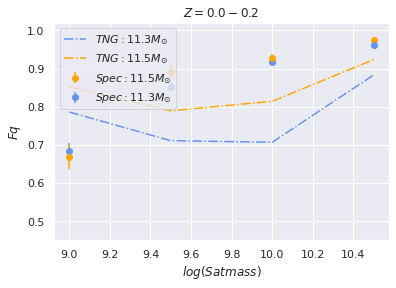

In [121]:
cen_bin = [11.3, 11.5, 11.7]
sate_bin = [9.0, 9.5, 10.0, 10.5,11.0]
color0 = ['cornflowerblue','orange']   #######e','seagreen',
for i in range(2):
    for j in range(4):
       
        if j==3:
            continue
        data = np.load("./result2.npy")
        plt.errorbar(sate_bin[j],data[0][i][j],data[1][i][j],color = color0[i],fmt = 'o')
plt.errorbar(sate_bin[-2],data[0][1][3],data[1][1][3],color = color0[1],fmt = 'o',label = "$Spec : %s M_{\odot}$"%cen_bin[1])
plt.errorbar(sate_bin[3],data[0][0][3],data[1][0][3],color = color0[0],fmt = 'o',label = "$Spec : %s M_{\odot}$"%cen_bin[0])

TNG = np.load("./TNG_fq.npz")
plt.plot(sate_bin[:-1],TNG['version2'][0],color = color0[0],linestyle = '-.',label = "$TNG : 11.3 M_{\odot}$")
plt.plot(sate_bin[:-1],TNG['version2'][1],color = color0[1],linestyle = '-.',label = "$TNG : 11.5 M_{\odot}$")


plt.xlabel("$log(Sat mass)$")
plt.ylabel("$Fq$")
plt.legend(loc = "upper left")
plt.title("$Z = 0.0 - 0.2$")
plt.ylim(0.45,1.02)
# plt.plot()
# plt.savefig("/home/yunzheng/PAC/picture/PCF_colorcut/Fq_0.3.pdf",dpi = 100)